In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
netflix_data = pd.read_csv('netflix_data.csv')

In [8]:
netflix_data.head(5)

,url,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,https://www.netflix.com/title/60000724,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2313221.0,MX
1,https://www.netflix.com/title/1154386,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,516523.0,"AT, CH, DE"
2,https://www.netflix.com/title/60031236,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1220488.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM..."
3,https://www.netflix.com/title/70021659,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,211314.0,"AD, AE, AG, AL, AO, AR, AT, AZ, BA, BB, BE, BG..."
4,https://www.netflix.com/title/1080395,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,443310.0,"AU, BA, BE, BG, CZ, HR, HU, MD, ME, MK, NZ, PL..."


In [9]:
netflix_data.isnull().sum()

url                   9158
title                  500
type                     0
genres                 148
releaseYear             12
imdbId                 682
imdbAverageRating      726
imdbNumVotes           726
availableCountries       0
dtype: int64

In [10]:
netflix_data.drop(columns=['url','imdbId'],inplace=True)

In [11]:
netflix_data['title'].fillna('Unknown title',inplace=True)

In [13]:
netflix_data['genres'].fillna('Unknown genres',inplace=True)

In [14]:
netflix_data['releaseYear'].fillna(netflix_data['releaseYear'].median(),inplace=True)

In [17]:
#To check skewness of the data to see if mean or median is best solution
netflix_data['imdbAverageRating'].skew()

-0.5775117337746363

In [18]:
#To check skewness of the data to see if mean or median is best solution
netflix_data['imdbNumVotes'].skew()

8.645153923432607

In [19]:
netflix_data['imdbAverageRating'].fillna(netflix_data['imdbAverageRating'].median(),inplace=True)

In [20]:
netflix_data['imdbNumVotes'].fillna(netflix_data['imdbNumVotes'].median(),inplace=True)

In [21]:
netflix_data.isnull().sum()

title                 0
type                  0
genres                0
releaseYear           0
imdbAverageRating     0
imdbNumVotes          0
availableCountries    0
dtype: int64

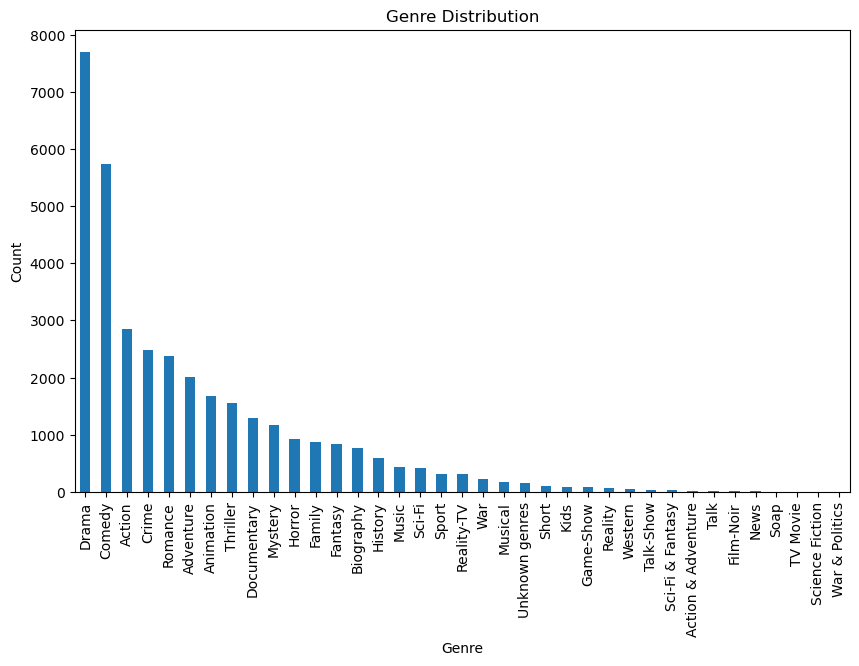

In [22]:
#Visualization of the genres distribution
plt.figure(figsize=(10,6))
genre_count = netflix_data['genres'].str.split(",").explode().str.strip().value_counts()
genre_count.plot(kind='bar',title='Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

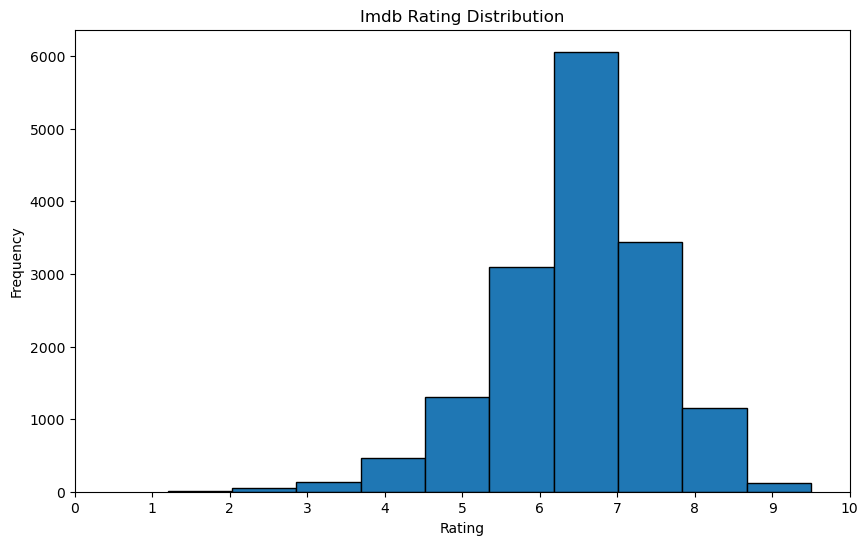

In [23]:
plt.figure(figsize=(10,6))
netflix_data['imdbAverageRating'].plot(kind='hist',bins=10,title = 'Imdb Rating Distribution',edgecolor='Black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(np.arange(0,11,1))
plt.show()

In [24]:
netflix_data['releaseYear'] = netflix_data['releaseYear'].astype(int)

In [25]:
#To find the movie releases per year
release_per_year = netflix_data.groupby('releaseYear').size()

In [26]:
release_per_year

releaseYear
1913      1
1917      1
1918      1
1919      2
1920      2
       ... 
2020    907
2021    767
2022    818
2023    706
2024    473
Length: 105, dtype: int64

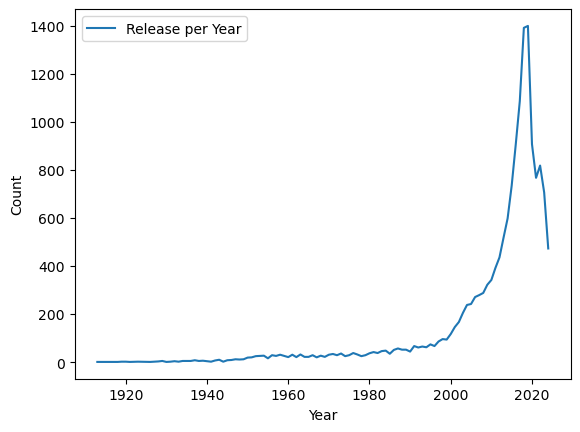

In [27]:
#Visualization to find the movies released per year
plt.plot(release_per_year.index,release_per_year,label = 'Release per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

In [28]:
average_rating_per_year = netflix_data.groupby('releaseYear')['imdbAverageRating'].mean()

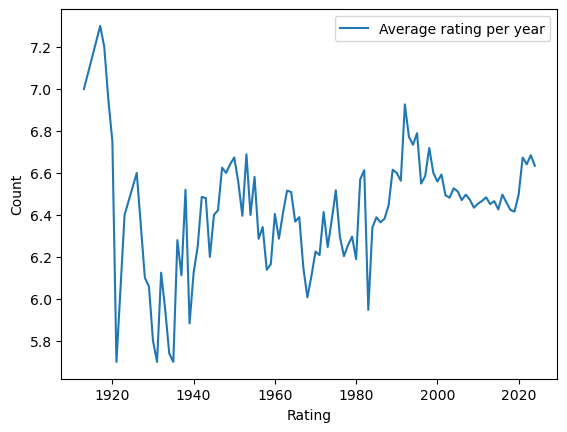

In [29]:
#Visualization to find the average rating of movies per year
plt.plot(average_rating_per_year.index,average_rating_per_year,label="Average rating per year")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend()
plt.show()

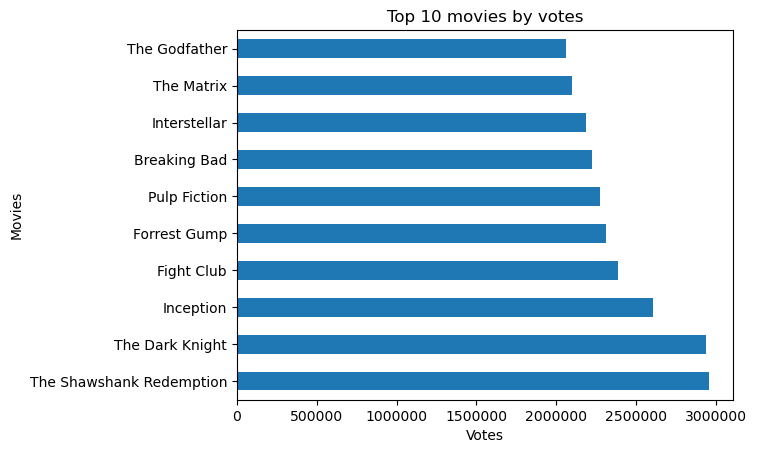

In [30]:
#Visualization to find the top 10 voted movies 
top_voted = netflix_data.nlargest(10,'imdbNumVotes').set_index('title')
top_voted['imdbNumVotes'].plot(kind='barh',title='Top 10 movies by votes')
plt.xlabel('Votes')
plt.ylabel('Movies')
plt.ticklabel_format(style='plain',axis='x')
plt.show()

In [31]:
#To use TfidfVectorizer and cosine similarity to make context based filtering on these netflix movie dataset
netflix_data['Content'] = netflix_data['title']+" "+(netflix_data['genres'].str.replace(","," ")*3)

In [32]:
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = tfidf.fit_transform(netflix_data['Content'])

In [33]:
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)

In [76]:
#To make a function so that we can find top 10 movies based on genres.
def get_recommendations(title):
    idx = netflix_data[netflix_data['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores,key = lambda x:x[1],reverse = True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return netflix_data[['title','genres']].iloc[movie_indices]

In [78]:
get_recommendations('The Dark Knight')

,title,genres
2894,Nobody,"Action, Crime, Drama"
13702,My Name,"Action, Crime, Drama"
13709,D.P.,"Action, Crime, Drama"
7226,Hold the Dark,"Action, Crime, Drama"
3090,The Man from Nowhere,"Action, Crime, Drama"
13219,Nowhere Man,"Action, Crime, Drama"
14301,Again My Life,"Action, Crime, Drama"
1506,Crime Story,"Action, Crime, Drama"
3360,Game,"Action, Crime, Drama"
332,We Own the Night,"Action, Crime, Drama"
